# PyCBC explorations

To do: create toc? [More info](https://stackoverflow.com/questions/21151450/how-can-i-add-a-table-of-contents-to-a-jupyter-jupyterlab-notebook)

In this notebook, we explore the various functionalities of the [PyCBC package](https://pycbc.org/pycbc/latest/html/index.html#) (also see [this Github](https://github.com/gwastro/pycbc)). This notebook is an initial exploration which extends the tutorials available from PyCBC (see [this website](https://github.com/gwastro/PyCBC-Tutorials)).

In [1]:
import pycbc
import pylab

## Tutorial 1 - Accessing Gravitational-wave data

_This tutorial is based on [this official PyCBC tutorial](https://colab.research.google.com/github/gwastro/pycbc-tutorials/blob/master/tutorial/1_CatalogData.ipynb#scrollTo=nTVKJ8BLMMcp)._

PyCBC has a [catalog](http://pycbc.org/pycbc/latest/html/catalog.html) of events. As a first step, let us explore how to retrieve certain useful information from these catalogs.

In [3]:
# There are various catalogs, although we restrict ourselves to 'confident' later on

from pycbc import catalog
catalog.catalog.list_catalogs()

['GWTC-1-confident',
 'GWTC-1-marginal',
 'Initial_LIGO_Virgo',
 'O1_O2-Preliminary',
 'O3_Discovery_Papers',
 'GWTC-2',
 'GWTC-2.1-confident',
 'GWTC-2.1-marginal',
 'GWTC-3-confident',
 'GWTC-3-marginal']

Only the "confident" catalogs report chirp masses for all events. These are the 90 events confirmed so far.

In [4]:
# Get params, for a catalog (we iterate only over confident  catalogs)
number = 0

for catalog_name in catalog.catalog.list_catalogs():
    if 'confident' in catalog_name:
        
        print("Catalog: " + catalog_name)
        c = catalog.Catalog(catalog_name)
        mchirp = c.median1d('mchirp')
        print(mchirp)
        number += len(mchirp)
        
print('These are %d events' % number)

Catalog: GWTC-1-confident
[28.6   15.2    8.9   21.4    7.9   35.4   24.9   24.1    1.186 26.5
 29.2  ]
Catalog: GWTC-2.1-confident
[34.   18.5  13.3  24.5  33.3  31.4   1.44 76.   29.3  14.6  21.8  29.1
 26.5  44.3  63.3  32.8  23.9  48.   38.1  25.1  40.2  45.6   8.4  13.1
 22.8   9.    7.4  29.4   8.6  29.7  27.6  31.9   6.11 24.6  13.4  33.5
 24.4  26.9   3.7   5.8  15.6  24.4  35.6   8.5 ]
Catalog: GWTC-3-confident
[ 8.34  7.82 47.5  10.7   8.65 29.9   7.31 19.8   8.55 18.4   8.33  4.32
 33.8  36.5  27.4   2.43 32.   27.2   7.49 27.7  19.6  26.7   6.56 32.9
 27.6  62.   28.2  31.1  14.2  23.4  17.5  19.   26.6   8.75 15.5 ]
These are 90 events


Catalogs other than "confident" are events of which it is not certain that they are GW events. They are not useful - e.g. some of the events return None when asked for chirp mass.

For specific events (first see which events there are):

In [62]:
# get ALL event names:
number = 0
all_events = {}

for catalog_name in catalog.catalog.list_catalogs():
    if 'confident' in catalog_name:
        
        # For each of the 3 "confident" catalogs, create empty list
        all_events[catalog_name] = []
        
        # Fill the list with mergers from that catalog:
        for merger_name in catalog.Catalog(catalog_name):
            all_events[catalog_name].append(merger_name)
            number += 1

print("Number of events: %d" % number)
print("List of all events shown below:")
print(all_events)

Number of events: 90
List of all events shown below:
{'GWTC-1-confident': ['GW150914-v3', 'GW151012-v3', 'GW151226-v2', 'GW170104-v2', 'GW170608-v3', 'GW170729-v1', 'GW170809-v1', 'GW170814-v3', 'GW170817-v3', 'GW170818-v1', 'GW170823-v1'], 'GWTC-2.1-confident': ['GW190403_051519-v1', 'GW190408_181802-v2', 'GW190412_053044-v4', 'GW190413_052954-v2', 'GW190413_134308-v2', 'GW190421_213856-v2', 'GW190425_081805-v3', 'GW190426_190642-v1', 'GW190503_185404-v2', 'GW190512_180714-v2', 'GW190513_205428-v2', 'GW190514_065416-v2', 'GW190517_055101-v2', 'GW190519_153544-v2', 'GW190521_030229-v4', 'GW190521_074359-v2', 'GW190527_092055-v2', 'GW190602_175927-v2', 'GW190620_030421-v2', 'GW190630_185205-v2', 'GW190701_203306-v2', 'GW190706_222641-v2', 'GW190707_093326-v2', 'GW190708_232457-v2', 'GW190719_215514-v2', 'GW190720_000836-v2', 'GW190725_174728-v1', 'GW190727_060333-v2', 'GW190728_064510-v2', 'GW190731_140936-v2', 'GW190803_022701-v2', 'GW190805_211137-v1', 'GW190814_211039-v3', 'GW190828_

In [6]:
# List the mergers in  a specific catalog
number = 0
for merger_name in catalog.Catalog():
    print(merger_name)
    number += 1
print("Number of events: %d" % number)

GW150914-v3
GW151012-v3
GW151226-v2
GW170104-v2
GW170608-v3
GW170729-v1
GW170809-v1
GW170814-v3
GW170817-v3
GW170818-v1
GW170823-v1
Number of events: 11


### Data of a specific merger

In [7]:
# for a specific event :
event_name = "GW150914-v3"
event = catalog.Merger(event_name)
mchirp = event.median1d("mchirp")
print("The chirp mass of the " + event_name + " event (in the source frame) was: %f" % mchirp)

The chirp mass of the GW150914-v3 event (in the source frame) was: 28.600000


In [8]:
# TO DO: undersand this
# to go from source frame to detector frame:
z = event.median1d('redshift') # get redshift of the event
det_mchirp = mchirp * (1 + z)
print("The chirp mass of the GW170817 event (in the detector frame) was: %f" % det_mchirp)

The chirp mass of the GW170817 event (in the detector frame) was: 31.174000


In [9]:
# all parameters which we can read:
print(event.data.keys())

dict_keys(['GPS', 'catalog.shortName', 'chi_eff', 'chi_eff_lower', 'chi_eff_unit', 'chi_eff_upper', 'chirp_mass', 'chirp_mass_lower', 'chirp_mass_source', 'chirp_mass_source_lower', 'chirp_mass_source_unit', 'chirp_mass_source_upper', 'chirp_mass_unit', 'chirp_mass_upper', 'commonName', 'far', 'far_lower', 'far_unit', 'far_upper', 'final_mass_source', 'final_mass_source_lower', 'final_mass_source_unit', 'final_mass_source_upper', 'jsonurl', 'luminosity_distance', 'luminosity_distance_lower', 'luminosity_distance_unit', 'luminosity_distance_upper', 'mass_1_source', 'mass_1_source_lower', 'mass_1_source_unit', 'mass_1_source_upper', 'mass_2_source', 'mass_2_source_lower', 'mass_2_source_unit', 'mass_2_source_upper', 'network_matched_filter_snr', 'network_matched_filter_snr_lower', 'network_matched_filter_snr_unit', 'network_matched_filter_snr_upper', 'p_astro', 'p_astro_lower', 'p_astro_unit', 'p_astro_upper', 'redshift', 'redshift_lower', 'redshift_unit', 'redshift_upper', 'reference', 

As before, get the event from the catalog:

In [10]:
event_name = "GW150914-v3"
event = catalog.Merger(event_name)
print(type(event))

<class 'pycbc.catalog.Merger'>


In [11]:
# get strain data, need to input the detector
strain_hanford = event.strain("H1") # Hanford
strain_livingston = event.strain("L1") # Livingston

These are so-called _pycbc time series_, but they also have meta-data (attributes), which we can view by calling dir. More information can be found in [the documentation](http://pycbc.org/pycbc/latest/html/pycbc.types.html#pycbc.types.timeseries.TimeSeries).

In [12]:
print(dir(strain_hanford))

['__abs__', '__add__', '__array__', '__array_ufunc__', '__class__', '__delattr__', '__dict__', '__dir__', '__div__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__iadd__', '__idiv__', '__imul__', '__init__', '__init_subclass__', '__isub__', '__itruediv__', '__le__', '__len__', '__lt__', '__module__', '__mul__', '__ne__', '__neg__', '__new__', '__pow__', '__radd__', '__rdiv__', '__reduce__', '__reduce_ex__', '__repr__', '__rmul__', '__rsub__', '__rtruediv__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__sub__', '__subclasshook__', '__truediv__', '__weakref__', '_checkother', '_copy', '_data', '_delta_t', '_epoch', '_getslice', '_getvalue', '_icheckother', '_memoize_single', '_return', '_returnarray', '_returntype', '_saved', '_scheme', '_swighelper', '_typecheck', '_vcheckother', '_vrcheckother', 'abs_arg_max', 'abs_max_loc', 'add_into', 'almost_equal_elem', 'almost_equal_norm', 'append_zeros', 'astype', 'at_time', 

In [13]:
# e.g., we can get time information on the event
print("Duration: {}s Start: {} End: {}".format(strain_hanford.duration, int(strain_hanford.start_time), int(strain_hanford.end_time)))
print(strain_hanford.end_time - strain_hanford.start_time) # sanity check!

Duration: 32.0s Start: 1126259447 End: 1126259479
32


Making a plot is easy: simply call the object itself to get the strain as $y$-values. To get time values, simply call for the attribute "sample_times".

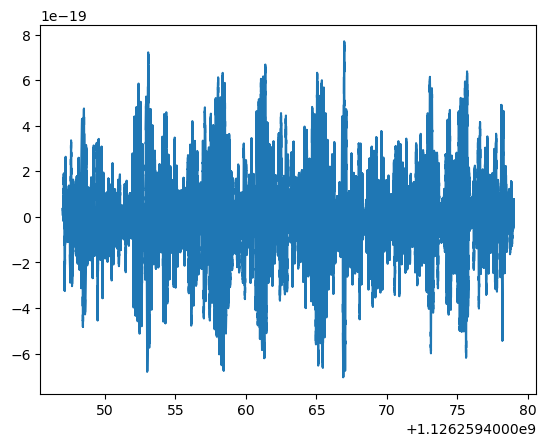

In [14]:
# make a plot (using pylab)
pylab.plot(strain_hanford.sample_times, strain_hanford)
pylab.show()

In [15]:
# can also get more data via API: see first tutorial, not sure what purpose?

For the following, you'll need to download a GWF (gravitational wave file) on your computer (in the same folder as this notebook) to continue. The file can be downloaded from the following link: https://losc.ligo.org/s/events/LVT151012/H-H1_LOSC_4_V2-1128678884-32.gwf , such that the filename is "H-H1_LOSC_4_V2-1128678884-32.gwf". Note that:
* Probable detections that are not confidently identified as gravitational wave events are designated LVT ("LIGO-Virgo trigger") ([source](https://en.wikipedia.org/wiki/List_of_gravitational_wave_observations))
* there is a Python package for the API: see [here](https://gwosc.readthedocs.io/en/stable/) for more information.

In [16]:
# GWF file - needs to be stored locally
GWF_name = "H-H1_LOSC_4_V2-1128678884-32.gwf"
# ..... (see tutorial, not going into further detail)

## Tutorial 2 - Visualization of Data and Signal Processing

_This tutorial is based on [this official PyCBC tutorial](https://colab.research.google.com/github/gwastro/pycbc-tutorials/blob/master/tutorial/2_VisualizationSignalProcessing.ipynb#scrollTo=7lgsEKNLavKY)._

In this tutorial we explore how to visualize LIGO/Virgo data and how to perform some basic signal processing on it, including high/low passing, psd estimation, and whitening.

In [17]:
# load an event we are interested in
event = catalog.Merger("GW150914-v3")

# Save the strain data of the different observators:

data = {} # we will save it into a dictionary
ifo_list = ["H1", "L1"] # Hanford & Livingston

for ifo in ifo_list:
    data[ifo] = event.strain(ifo)

In [18]:
# Note: the official guide wants us to get sample times twice, but they are in fact the same!!!
times1 = event.strain("H1").sample_times
times2 = event.strain("L1").sample_times
times1 == times2

True

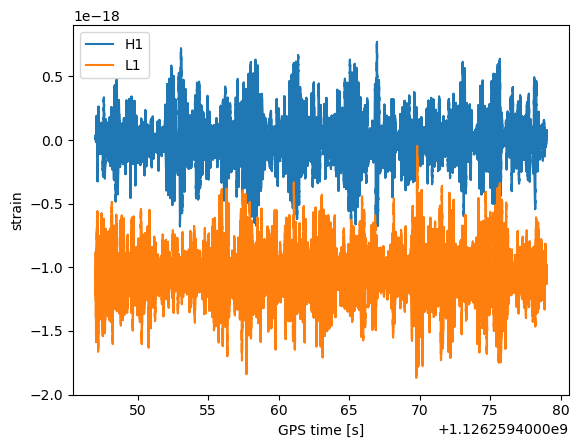

In [19]:
# Plot the two strains:

for ifo in ifo_list:
    time_values = data[ifo].sample_times # time during merger (GPS time in s)
    strain_values = data[ifo] # remember, simply calling strain timeseries gives the strain
    
    pylab.plot(time_values, strain_values, label = ifo)

pylab.legend()
pylab.xlabel('GPS time [s]')
pylab.ylabel('strain')
pylab.show()

### Zooming into data

**Important:** When you just zoom in to one second around GW150914, all you can see is the low frequency behavior of the noise, since it is much louder than the higher frequency noise (and signal). The PyCBC time series have built-in functions to zoom into the time series! Below, we show the application of this 'zoom' function.

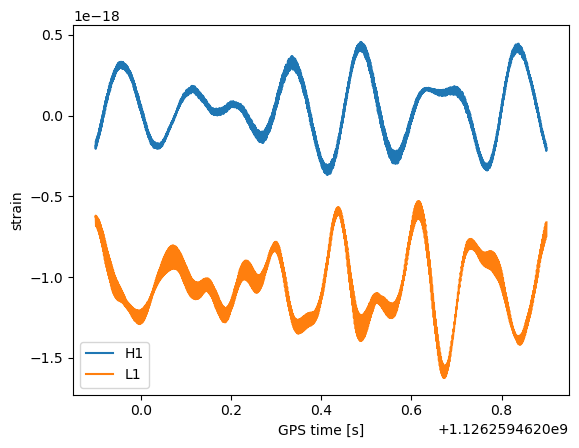

In [20]:
# let us zoom into one second: this means we limit ourselves to the event time \pm 0.5 seconds

slice_time = 1 # choose the time window in seconds (play around with this!!!)
slice_time_half = 0.5 * slice_time

for ifo in ifo_list:
    
    zoom = data[ifo].time_slice(event.time - slice_time_half, event.time + slice_time_half) # limit the time window using time_slice
    
    pylab.plot(zoom.sample_times, zoom, label = ifo)

pylab.legend()
pylab.xlabel('GPS time [s]')
pylab.ylabel('strain')
pylab.show()

### Highpass the data

Below we apply a highpass filter to the data to suppress the low frequency noise of the instrument. We can see that this brings the dynamic range of the data largely into the same range. However, there is clearly still some dominant frequencies. To equalize this, we would need to apply a whitening filter.

We choose here a finite-impulse-response (FIR). The options for the function are:
* highpass frequency
* half sample length of highpass filter (higher value will give less ripple in passband)

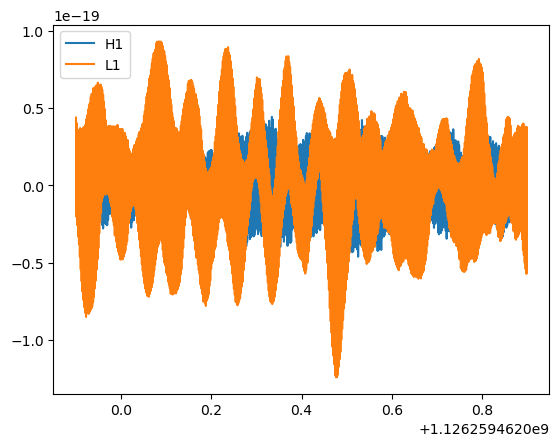

In [29]:
highpass_frequency = 15 # Highpass point is 15 Hz
half_sample_length = 512

for ifo in data:
    
    # Filter the data
    high_data = data[ifo].highpass_fir(highpass_frequency, half_sample_length) 
    
    # Zoom as before 
    zoom = high_data.time_slice(event.time - slice_time_half, event.time + slice_time_half)
    pylab.plot(zoom.sample_times, zoom, label=ifo)
    
pylab.legend()
pylab.show()

### Power spectral density

We want to understand how the noise power varies over frequency in LIGO data analysis. We use a version of [Welch's method](https://en.wikipedia.org/wiki/Welch%27s_method). This estimates the PSD by sub-dividing the data into overlapping segments, (below: segments have lengths of 4s)  to estimate the power spectral density of the data.

Calling psd creates a "FrequencySeries" object. This is quite similar to strain being a TimeSeries, as shown by the code below. Calling sample_frequencies automatically provides the correct frequency values, much like how sample_times worked. Calling psd, like calling strain, provides the values for the $y$-axis. This is the square of strain.

<class 'pycbc.types.frequencyseries.FrequencySeries'>


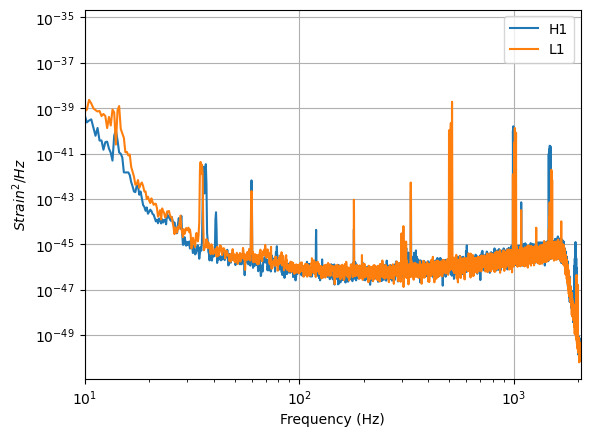

In [33]:
for ifo in data:
    
    psd = data[ifo].psd(4) # argument: 4s interval lengths
    
    # Plot in loglog scale
    pylab.loglog(psd.sample_frequencies, psd, label = ifo)
    
print(type(psd)) # to show that this is a frequencyseries

# Lay-out
pylab.legend()
pylab.xlabel('Frequency (Hz)')
pylab.ylabel('$Strain^2 / Hz$')
pylab.grid()
pylab.xlim(10, 2048)
pylab.show()

Note that there is a significant amount of noise at low frequencies (orders of magnitude). Note also that there is a large amount of power at a few specific frequencies. The causes for these include 60 Hz power line noise, violin modes of the hanging mirrors, and various other instrumental resonances. The downturn in power before 2 KHz is due to a low pass filter that was applied prior to resampling the data to 4096 Hz.

### Whitening the data

To visualize deviations from the noise, it is useful to "whiten" the data within some frequency range. In this way excesses in the data are visible as deviations from zero. Whitening takes the data and attempts to make the power spectral density flat, so that all frequencies contribute equally. 

Below we will whiten the data, and then bandpass the result to focus on a specific frequency range.  This works by estimating the power spectral density from the data and then flattening the frequency response. The options are:
* an option to set the duration in seconds of each sample of the data used as part of the PSD estimate, and
* an option to set the duration of the filter to apply

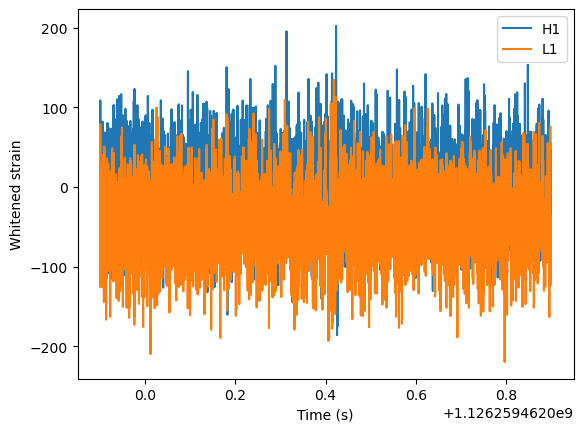

In [34]:
# We create a dictionary, just like "data" is a dictionary, for the H1 and L1 detectors
whitened = {}

for ifo in data:
    whitened[ifo] = data[ifo].whiten(4, 4)
    
    # Zoom, as before
    zoom = whitened[ifo].time_slice(event.time - slice_time_half, event.time + slice_time_half)
    pylab.plot(zoom.sample_times, zoom, label = ifo)
    
pylab.xlabel('Time (s)')
pylab.ylabel('Whitened strain')
pylab.legend()
pylab.show()

We will now bandpass the data around GW150914 between 30 - 250 Hz. This will remove frequency ranges which won't contribute to this kind of signal and make it possible to see the signal in question. To achieve this, we first apply a highpass filter (at 30 Hz) followed by an lowpass filter (at 250 Hz).

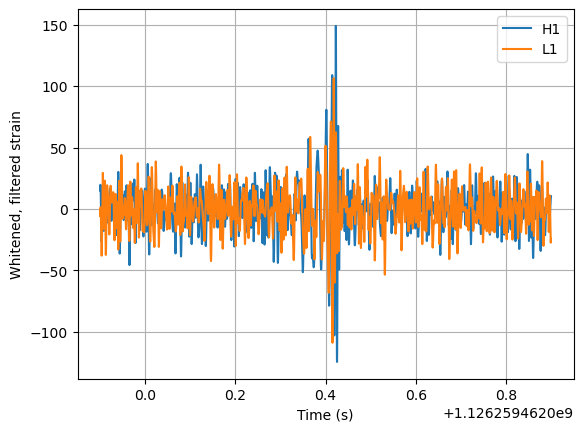

In [40]:
bpsd_dict = {} 

for ifo in whitened: 
    bpsd = whitened[ifo].highpass_fir(30, 512).lowpass_fir(250, 512)
    
    bpsd_dict[ifo] = bpsd # save for later
    
    # Zoom, like before
    zoom = bpsd.time_slice(event.time - slice_time_half, event.time + slice_time_half)
    pylab.plot(zoom.sample_times, zoom, label = ifo)
    
pylab.grid()
pylab.legend()
pylab.xlabel('Time (s)')
pylab.ylabel('Whitened, filtered strain')
pylab.show()

### Focus plot on the event & align signals

In the above plot we can see that there is some excess signal that sticks above the noise. Let's zoom around this time now. This requires us essentially to change the parameters given to time_slice. We will therefore introduce new parameters to easily modify the time window. We'll also make the plot more horizontal.

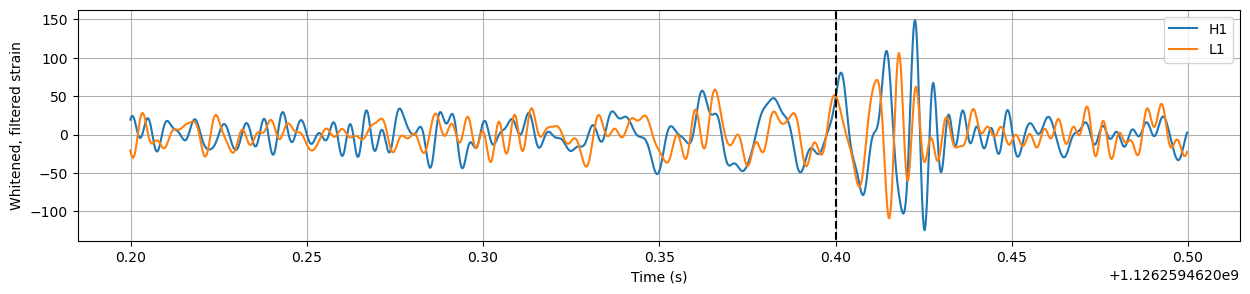

In [54]:
# Introduce new parameters for time_slice:
time_before = 0.2
time_after = 0.1

pylab.figure(figsize = (15, 3)) # make plot more horizontal

for ifo in bpsd_dict:
    
    # Zoom, in a tighter time window
    zoom = bpsd_dict[ifo].time_slice(event.time - time_before, event.time + time_after)
    
    # Plot
    pylab.plot(zoom.sample_times, zoom, label = ifo)
    
    
pylab.grid()
pylab.legend()
pylab.xlabel('Time (s)')
pylab.ylabel('Whitened, filtered strain')

# Also add a dashed line at the "event time", to show which value has been stored for this
pylab.axvline(event.time, -100, 100, color = 'black', linestyle = '--')
pylab.show()

Both signals are not yet aligned, as you can more easily see by zooming even more into the signal above (play around with time_before and time_after). Indeed, the signal arrrives earlier at L1 compared to H1. Where does this come from? There are two contributions:
* We already knew that the signal was ~ 7 ms separated between detectors.
* The two LIGO interferometers are roughly aligned so that the output of one is a sign change of the other for *many* sky locations. This is an approximation and doesn't hold for all possible source sky locations. A later tutorial will show how to estimate this alignment more precisely.

Small note (for myself): below, I zoom and then apply the roll on the zoom data, which is in reversed order compared to the PyCBC tutorial. This is apparantly allowed and works as well!

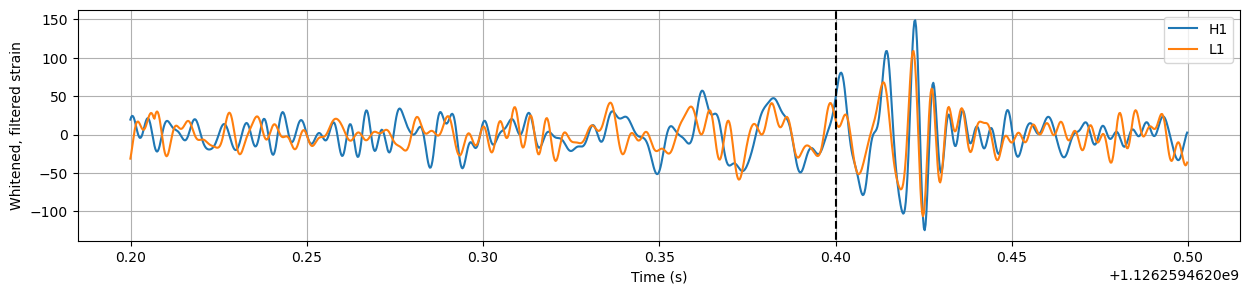

In [55]:
pylab.figure(figsize = (15, 3)) # make plot more horizontal

for ifo in bpsd_dict:
    
    # Zoom in again 
    zoom = bpsd_dict[ifo].time_slice(event.time - time_before, event.time + time_after)
    
    # Now we "roll" the L1 data by the 7ms time difference, as follows:
    if ifo == 'L1':
        zoom.roll(int(bpsd.sample_rate * 0.007))
        zoom *= -1
    
    # Plot
    pylab.plot(zoom.sample_times, zoom, label = ifo)
    
pylab.grid()
pylab.legend()
pylab.xlabel('Time (s)')
pylab.ylabel('Whitened, filtered strain')

# Also add a dashed line at the "event time", to show which value has been stored for this
pylab.axvline(event.time, -100, 100, color = 'black', linestyle = '--')
pylab.show()

The signal is now aligned! Note that the time of the merger, at 0.4 in the above plot, is not right at the peak of the merger of the event!

### Visualizing excesses with the $Q$-transform plot

A common way to visualize gravitational-wave data is with a time-frequency representation known as the [constant-Q transform](https://en.wikipedia.org/wiki/Constant-Q_transform). It is similar to a standard spectrogram made with short-time Fourier transforms with the advantage that frequency bins are more sparsely spaced at high frequencies.

To achieve this, we can call the qtransform function in PyCBC. The qtransform method returns a vector of the sample times, frequencies, and a 2-d vector of the power in each time-frequency bin. The free parameter is the choice of the Q-value. Larger Q-values are generally more appropriate for viewing long duration features of the data and vice versa. The options of qtransform are
* The time spacing for the output image (i.e. 1 ms in this case)
* The number of frequency bins in the output, logarithmically spaced
* The qrange to maximize over. We'll pick a constant at 8 here. Typically higher values will be more appropriate for longer duration signals
*  The frequency range to output

/tmp/ipykernel_379/4152453397.py:18: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pylab.pcolormesh(times, freqs, power**0.5)


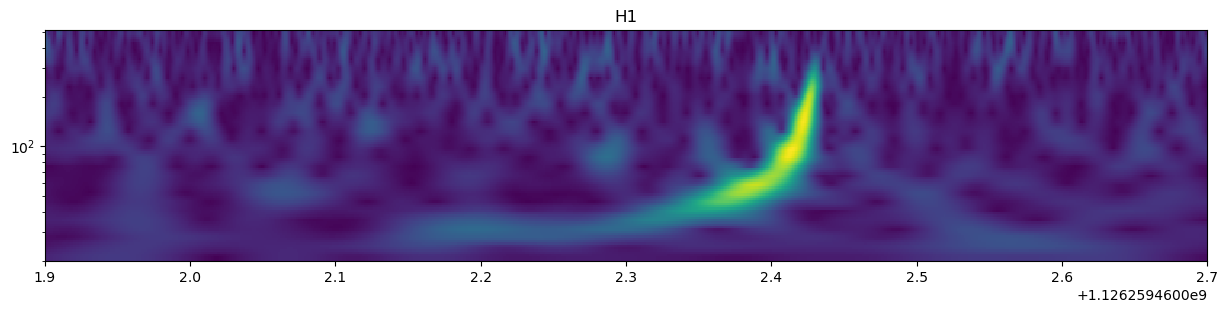

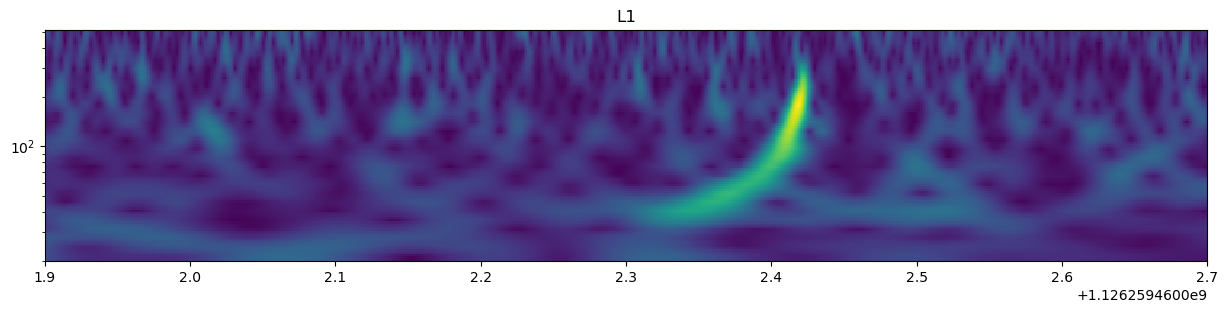

In [57]:
# As before, we get variables to choose a symmetric time window to zoom into
slice_time = 10
slice_time_half = 0.5 * slice_time

for ifo in whitened:
    
    # Again zoom into signal
    zoom = whitened[ifo].time_slice(event.time - slice_time_half, event.time + slice_time_half)
    
    # Call qtransform. Note that 3 outputs are given!
    times, freqs, power = zoom.qtransform(0.001, logfsteps = 100, qrange = (8,8), frange = (20, 512))
    
    # Make two separate figures
    pylab.figure(figsize = (15, 3))
    
    # We will make a "pcolormesh"
    pylab.pcolormesh(times, freqs, power**0.5)
    pylab.xlim(event.time - 0.5, event.time + 0.3)
    pylab.title(ifo)
    pylab.yscale('log')
    pylab.show()

The GW150914 signal is relatively clear in the qtransform output, which is why the Q-transform can be a powerful diagnostic. However, note that quieter signals, especially those with lower masses than GW150914 had, will be harder to spot visually. In practice, we instead use a technique called matched filtering to find signals in our data.

### Recap: another event

To recap in speed what we've seen, we repeat the above analysis for a different event.

In [103]:
# # To look at all events, uncomment next line
print(all_events.keys())
all_events["GWTC-1-confident"]

dict_keys(['GWTC-1-confident', 'GWTC-2.1-confident', 'GWTC-3-confident'])


['GW150914-v3',
 'GW151012-v3',
 'GW151226-v2',
 'GW170104-v2',
 'GW170608-v3',
 'GW170729-v1',
 'GW170809-v1',
 'GW170814-v3',
 'GW170817-v3',
 'GW170818-v1',
 'GW170823-v1']

In [104]:
# Choose a specific event, and look for source catalog
# all_events # to look up all events, and choose one
merger_name = "GW151012-v3"
catalog_name = "gwtc-1" # put catalog name here

### Get data & whiten it as before
event = catalog.Merger(merger_name, source = catalog_name)

# Save raw strain data
data = {} 
for ifo in ifo_list:
    data[ifo] = event.strain(ifo)
    
# Whiten the data
whitened = {}
for ifo in data:
    
    whitened[ifo] = data[ifo].whiten(4, 4)
    
# Filter the data
bpsd_dict = {} 
for ifo in whitened: 
    bpsd = whitened[ifo].highpass_fir(30, 512).lowpass_fir(250, 512)
    
    bpsd_dict[ifo] = bpsd # save for later

Plot the strain:

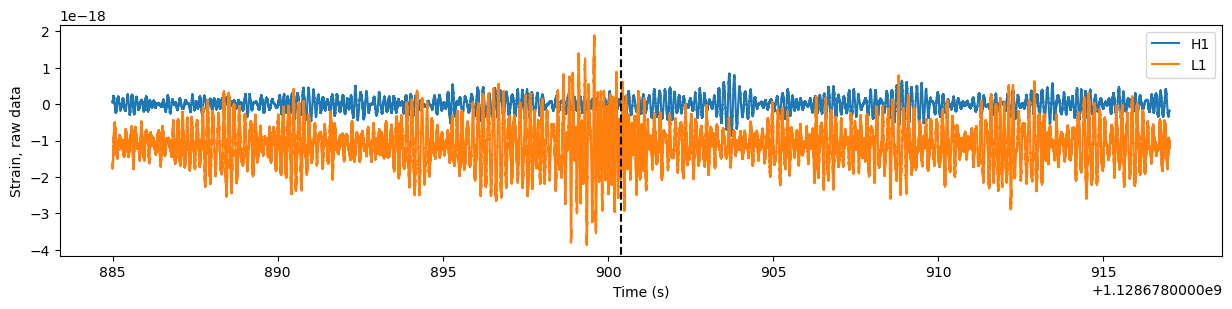

In [105]:
# As before, we get variables to choose a symmetric time window to zoom into
time_before = 5
time_after = 5

do_zoom = False

pylab.figure(figsize = (15, 3))
for ifo in data:
    
    # Choose if we want to perform the zoom or not:
    if do_zoom:
        zoom = data[ifo].time_slice(event.time - time_before, event.time + time_after)
        plotting_data = zoom
    else:
        plotting_data = data[ifo]
    
    # Plot the data
    pylab.plot(plotting_data.sample_times, plotting_data, label = ifo)
    
# pylab.xlim(event.time - time_before, event.time + time_after)
pylab.xlabel('Time (s)')
pylab.ylabel('Strain, raw data')
pylab.legend()

# Also add a dashed line at the "event time", to show which value has been stored for this
pylab.axvline(event.time, -100, 100, color = 'black', linestyle = '--')
pylab.show()

Plot the whitened, filtered data:

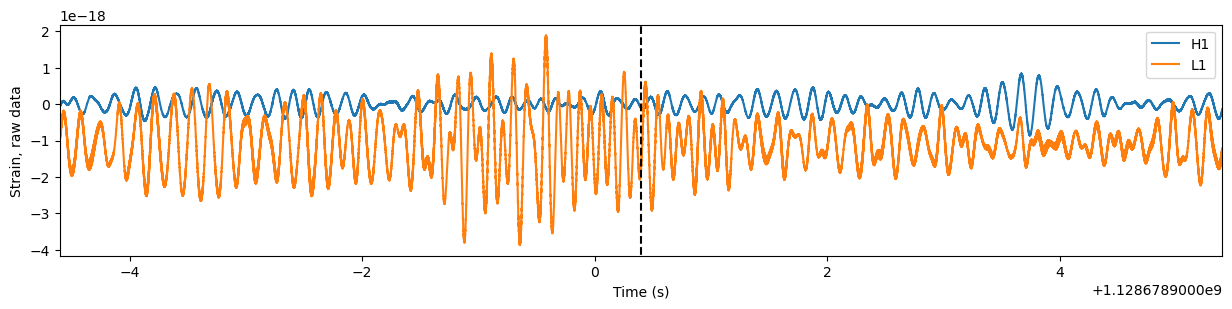

In [106]:
# As before, we get variables to choose a symmetric time window to zoom into
time_before = 5
time_after = 5

pylab.figure(figsize = (15, 3))
for ifo in data:
    
    # Without zoom:
    zoom = data[ifo].time_slice(event.time - time_before, event.time + time_after)
    pylab.plot(zoom.sample_times, zoom, label = ifo)
    
    # Again zoom into signal
    
    #zoom = bpsd_dict[ifo].time_slice(event.time - time_before, event.time + time_after)
    #pylab.plot(zoom.sample_times, zoom, label = ifo)
    
pylab.xlim(event.time - time_before, event.time + time_after)
pylab.xlabel('Time (s)')
pylab.ylabel('Strain, raw data')
pylab.legend()

# Also add a dashed line at the "event time", to show which value has been stored for this
pylab.axvline(event.time, -100, 100, color = 'black', linestyle = '--')
pylab.show()

/tmp/ipykernel_379/1374775771.py:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pylab.pcolormesh(times, freqs, power**0.5)


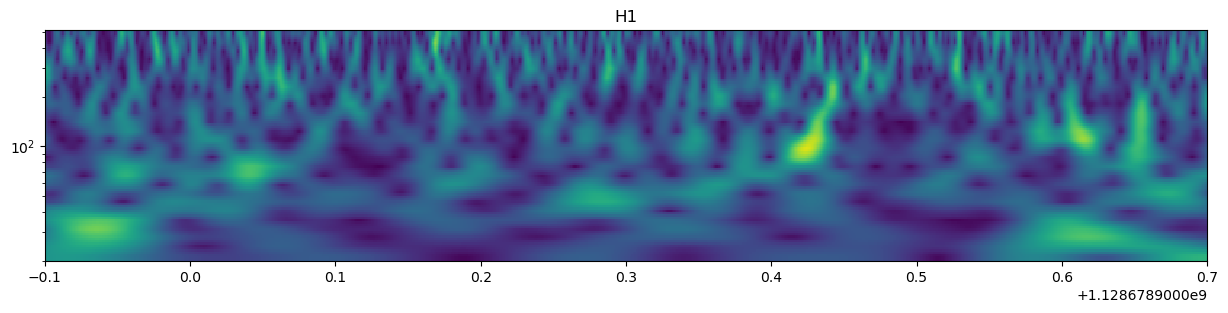

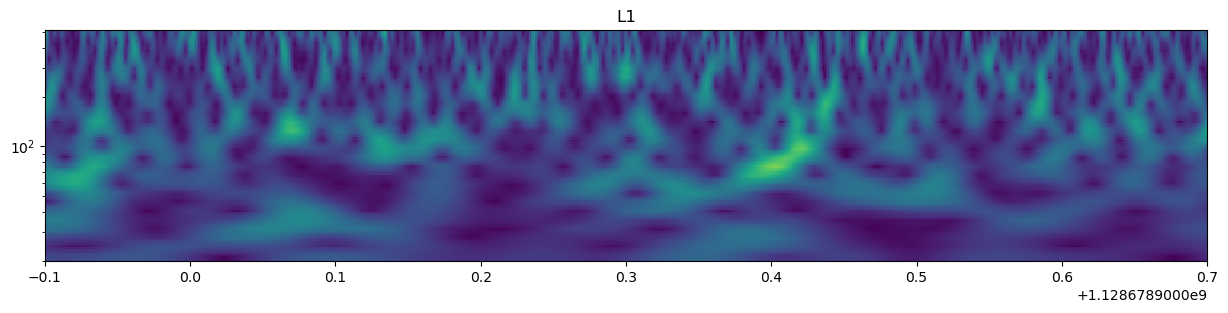

In [107]:
# As before, we get variables to choose a symmetric time window to zoom into
time_before = 0.2
time_after = 0.2


for ifo in data:
    # Again zoom into signal
    zoom = whitened[ifo].time_slice(event.time - slice_time_half, event.time + slice_time_half)
    
    # Call qtransform. Note that 3 outputs are given!
    times, freqs, power = zoom.qtransform(0.001, logfsteps = 100, qrange = (8,8), frange = (20, 512))
    
    # Make two separate figures
    pylab.figure(figsize = (15, 3))
    
    # We will make a "pcolormesh"
    pylab.pcolormesh(times, freqs, power**0.5)
    pylab.xlim(event.time - 0.5, event.time + 0.3)
    pylab.title(ifo)
    pylab.yscale('log')
    pylab.show()

Likely, some of the parameters have to be changed in order to improve the above analysis, and make the signal clearer.

### Challenge problem

Use the methods demonstrated above to see if you can visually spot a chirping signal in these data sets. Which of them contain a signal? Which contains just Gaussian noise?

Information that may be useful:

* Signals are all placed between 100 and 120 seconds into the frame file.
* Try whitening the data, then plotting the qtransform.
* Each file starts at gps time 0, and ends at gps time 128
* The channel name in each file is "H1:TEST-STRAIN"

In [108]:
from six.moves.urllib import request

def get_file(fname):
    url = "https://github.com/ahnitz/odw-storage/raw/master/{}"
    url = url.format(fname)
    request.urlretrieve(url, fname)
    print('Getting : {}'.format(url))

files = ['PyCBC_T2_0.gwf', 'PyCBC_T2_1.gwf', 'PyCBC_T2_2.gwf',
         'PyCBC_T2_3.gwf', 'PyCBC_T2_4.gwf']

for fname in files:
    get_file(fname)

Getting : https://github.com/ahnitz/odw-storage/raw/master/PyCBC_T2_0.gwf
Getting : https://github.com/ahnitz/odw-storage/raw/master/PyCBC_T2_1.gwf
Getting : https://github.com/ahnitz/odw-storage/raw/master/PyCBC_T2_2.gwf
Getting : https://github.com/ahnitz/odw-storage/raw/master/PyCBC_T2_3.gwf
Getting : https://github.com/ahnitz/odw-storage/raw/master/PyCBC_T2_4.gwf


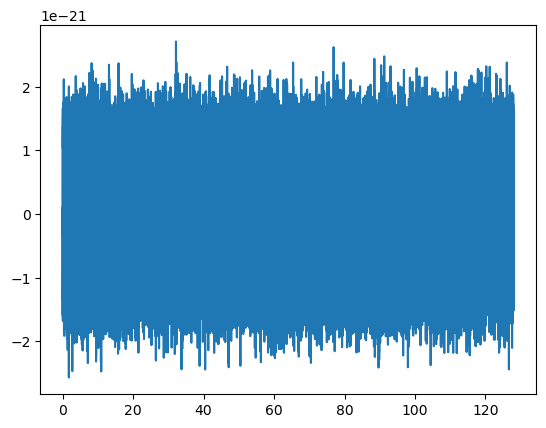

In [109]:
import pycbc.frame

# example of reading the strain in (note this is the same as in PyCBC tutorial 1)
ts = pycbc.frame.read_frame('PyCBC_T2_0.gwf', 'H1:TEST-STRAIN', 0, 128)

pylab.plot(ts.sample_times, ts)
pylab.show()

In [110]:
# to finish . . . .

## Tutorial 3 - Generating Waveforms and Matched Filtering

_This tutorial is based on [the official PyCBC tutorial](https://colab.research.google.com/github/gwastro/pycbc-tutorials/blob/master/tutorial/3_WaveformMatchedFilter.ipynb#scrollTo=j4kvksgRn367)._

Here we'll generate the gravitational waveform using one of the available waveform approximants. These can be generated as a time series using [`get_td_waveform`](http://pycbc.org/pycbc/latest/html/pycbc.waveform.html#pycbc.waveform.waveform.get_td_waveform). Let us load the required module. 

In [111]:
from pycbc.waveform import get_td_waveform

There are some additional examples using this interface [here](http://pycbc.org/pycbc/latest/html/waveform.html). The key parameters are 
* the masses of the binary (given in solar masses), 
* the time between samples (in seconds), 
* the starting gravitational-wave frequency (Hz), and 
* the name of the approximant we'd like to generate. 

A variety of approximants are available that include different physical effects. A full review of the different models is outside of the scope of the  tutorial.

In this example, we've chosen to use the `SEOBNRv4_opt` model. There are many others available as well with different methodologies and which include different physical effects. This is an implementation of the model introduced [in this paper](https://arxiv.org/pdf/1611.03703.pdf). It models the gravitational waveform of inspiralling and merging black holes, and includes the ability for each black hole to spin in the same direction as the orbit (aligned spin).

The output of this function are the "plus" and "cross" polarizations of the gravitational-wave signal as viewed from the line of sight at a given source inclination (assumed face-on if not provided). These outputs are like the strain TimeSeries objects that we encountered above in the GW data.

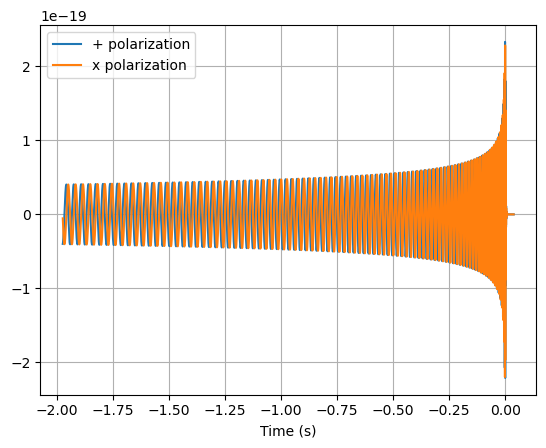

In [113]:
hp, hc = get_td_waveform(approximant = "SEOBNRv4_opt", mass1 = 10, mass2 = 10, delta_t = 1.0/4096, f_lower = 30)

# Plot:
pylab.plot(hp.sample_times, hp, label = '+ polarization')
pylab.plot(hp.sample_times, hc, label = 'x polarization')
pylab.xlabel('Time (s)')
pylab.legend()
pylab.grid()
pylab.show()

 Since hp and hc are TimeSeries objects, we can zoom into a region using time_slice like before with the GW merger event data.

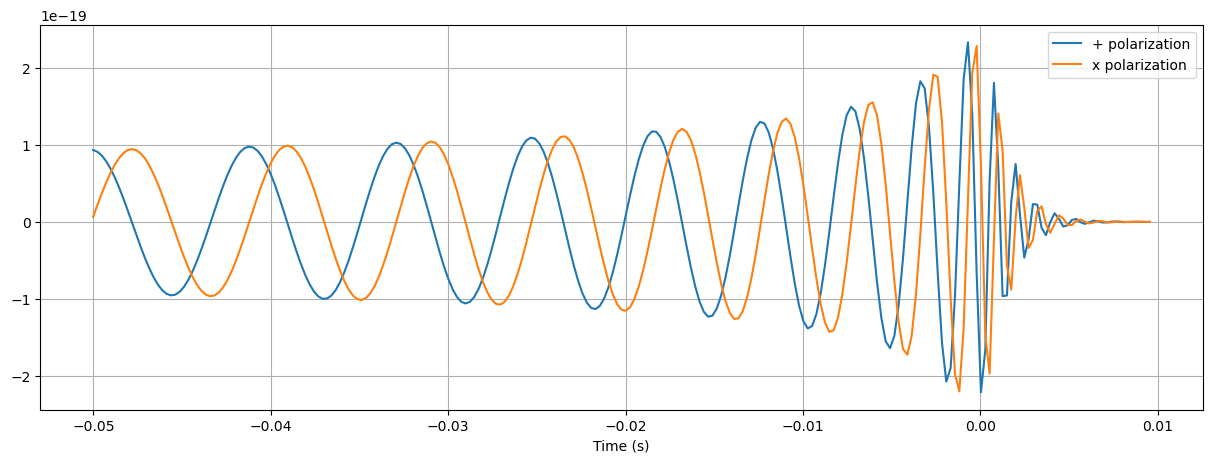

In [124]:
# Specify the time window
event_time = 0
time_before = 0.05
time_after = 0.01

# Save simulated strain data in a list
strain_data = [hp, hc]
names = ["+ polarization", "x polarization"]

pylab.figure(figsize = (15,5))
for i, h in enumerate([hp, hc]):
    zoom = h.time_slice(event_time - time_before, event_time + time_after)
    
    pylab.plot(zoom.sample_times, zoom, label = names[i])
    
pylab.xlabel('Time (s)')
pylab.legend()
pylab.grid()
pylab.show()

The PyCBC tutorial, which you can find [here](https://colab.research.google.com/github/gwastro/pycbc-tutorials/blob/master/tutorial/3_WaveformMatchedFilter.ipynb#scrollTo=j4kvksgRn367), then explores the effect of masses and distance in the generated waveform. 

### Looking for a signal

If you know what signal you are looking for in the data, then matched filtering is known to be the optimal method in Gaussian noise to extract the signal. Even when the parameters of the signal are unkown,  one can test for each set of parameters one is interesting in finding.

#### Preconditioning

First, we precondition the data. The purpose of this is to reduce the dynamic range of the data and supress low freqeuncy behavior which can introduce numerical artefacts. We may also wish to resample the data if high frequency content is not important. We import modules from PyCBC first.

In [130]:
from pycbc.filter import resample_to_delta_t, highpass

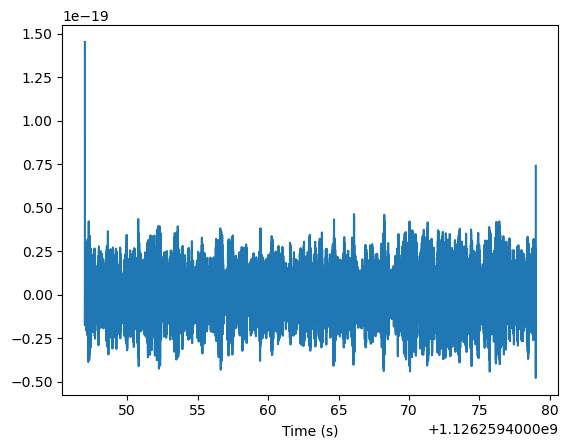

In [131]:
# As before, study GW150914 as application
merger_name = "GW150914-v3"
event = catalog.Merger(merger_name)
strain = event.strain("H1") # restrict to Hanford data

# Remove the low frequency content and downsample the data to 2048Hz
strain = resample_to_delta_t(highpass(strain, 15.0), 1.0/2048)
                             
# Plot
pylab.plot(strain.sample_times, strain)
pylab.xlabel('Time (s)')
pylab.show()

#### Filter wraparound

Note the spike in the data at the boundaries! This is caused by the highpass and resampling stages filtering the data. When the filter is applied to the boundaries, it wraps around to the beginning of the data. Since the data itself has a discontinuity (i.e. it is not cyclic) the filter itself will ring off for a time up to the length of the filter.

Even if a visible transient is not seen, we want to avoid filters that act on times which are not causally connected. To avoid this we trim the ends of the data sufficiently to ensure that they do not wraparound the input. We will enforce this requirement in all steps of our filtering.

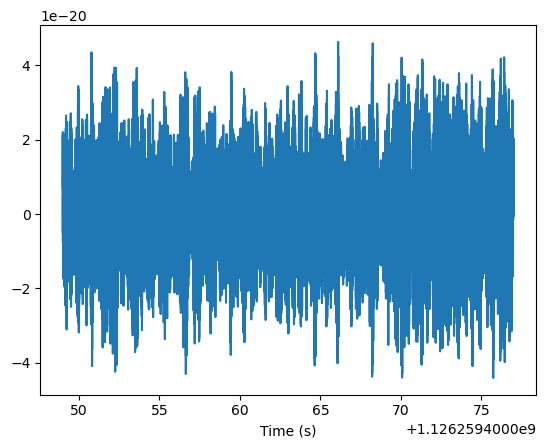

In [132]:
# Remove 2 seconds of data from both the beginning and end
conditioned = strain.crop(2, 2)

pylab.plot(conditioned.sample_times, conditioned)
pylab.xlabel('Time (s)')
pylab.show()

#### Calculating PSD

Optimal matched filtering requires weighing the frequency components of the potential signal and data by the noise amplitude. We can view this as filtering the data with the time series equivelant of 1/PSD. To ensure that we can control how much applying this filter to the data, we window the time domain equivelant of the PSD to a specific length. This has effect of losing some information about line behavior in the detector. However, since our signal span a large frequency range, and lines are narrow, this is a negligible effect. First, let us import some modules from PyCBC.

In [135]:
from pycbc.psd import interpolate, inverse_spectrum_truncation

As before, we compute the PSD using the Welch method and 4s samples:

In [136]:
psd = conditioned.psd(4)

Now that we have the psd we need to interpolate it to match our data and then limit the filter length of 1/PSD. After this, we can directly use this PSD to filter the data in a controlled manner.

In [137]:
psd = interpolate(psd, conditioned.delta_f)

Now, 1/PSD will  act as a filter with an effective length of 4 seconds. Since the data has been highpassed above 15 Hz, and will have low values below this we need to informat the function to not include frequencies below this frequency. 

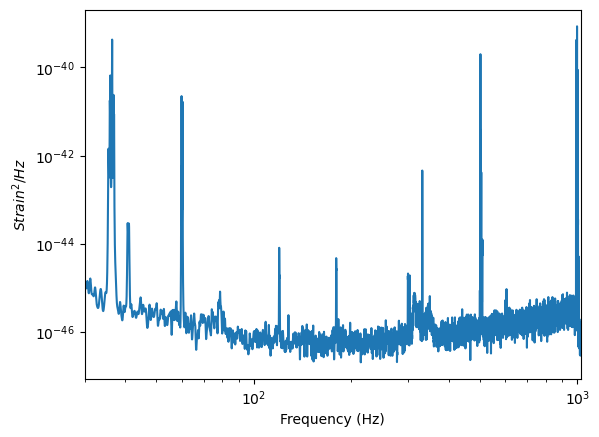

In [138]:
psd = inverse_spectrum_truncation(psd, int(4 * conditioned.sample_rate), low_frequency_cutoff = 15)

# Plot
pylab.loglog(psd.sample_frequencies, psd)
pylab.ylabel('$Strain^2 / Hz$')
pylab.xlabel('Frequency (Hz)')
pylab.xlim(30, 1024)
pylab.show()

#### Making signal model

Conceptually, matched filtering involves laying the potential signal over your data and integrating (after weighing frequencies correctly). If there is a signal in the data that aligns with your 'template', you will get a large value when integrated over.  In this case we "know" what the signal parameters are. In a search, we would grid over the parameters and calculate the SNR time series for each one. We'll assume equal masses, which is within the posterior probability of GW150914. We'll put this mass equal to 36 solar masses.

In [139]:
m = 36
hp, hc = get_td_waveform(approximant = "SEOBNRv4_opt", mass1 = m, mass2 = m, delta_t = conditioned.delta_t, f_lower = 20)

# Resize the vector to match our data
hp.resize(len(conditioned))

The waveform begins at the start of the vector, so if we want the SNR time series to correspond to the approximate merger location we need to shift the data so that the merger is approximately at the first bin of the data. The following function rotates the vector by a fixed amount of time. It treats the data as if it were on a ring. Note that time stamps are *not* in general affected, but the true position in the vector is. By convention waveforms returned from `get_td_waveform` have their merger stamped with time zero, so we can use the start time to shift the merger into position.

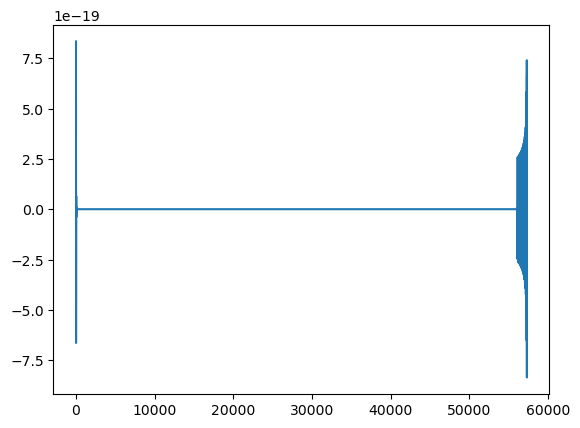

In [140]:
template = hp.cyclic_time_shift(hp.start_time)
pylab.plot(template)
pylab.show()

### Computing the SNR time series

In this section we will now calculate the signal-to-noise time series for our template. We'll take care to handle issues of filter corruption/wraparound by truncating the output time series. We need to account for both the length of the template and 1/PSD.

In [141]:
from pycbc.filter import matched_filter
import numpy

In [142]:
# Compute SNR time series
snr = matched_filter(template, conditioned, psd = psd, low_frequency_cutoff = 20)

Remove time corrupted by the template filter and the psd filter. We remove 4 seonds at the beginning and end for the PSD filtering, and we remove 4 additional seconds at the beginning to account for the template length (this is somewhat generous for  so short a template, for a longer signal such as from a BNS, we would require much more padding at the beginning of the vector).

In [143]:
snr = snr.crop(4 + 4, 4)

Now we plot the time series. Note: we take an abs here, why? The `matched_filter` function actually returns a 'complex' SNR. What that means is that the real portion correponds to the SNR associated with directly filtering the template with the data. The imaginary portion corresponds to filtering with a template that is 90 degrees out of phase. Since the phase of a signal may be anything, we choose to maximize over the phase of the signal.

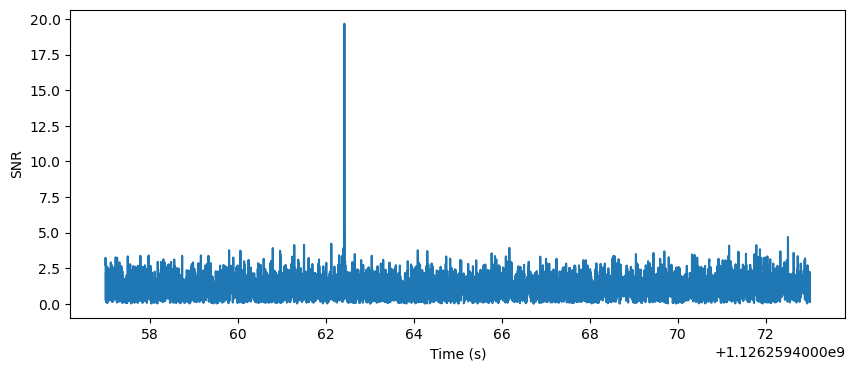

In [144]:
pylab.figure(figsize=[10, 4])

pylab.plot(snr.sample_times, abs(snr))
pylab.ylabel('SNR')
pylab.xlabel('Time (s)')
pylab.show()

We can extract the signal information from the peak we see in the plot using tools from the Numpy library.

In [145]:
peak = abs(snr).numpy().argmax()
snrp = snr[peak]
time = snr.sample_times[peak]

print("We found a signal at {}s with SNR {}".format(time, abs(snrp)))

We found a signal at 1126259462.4248047s with SNR 19.67708901314587


### Aligning and subtracting proposed signal

In the previous section we found a peak in the signal-to-noise for a proposed binary black hole merger. We can use this SNR peak to align our proposal to the data, and to also subtract our proposal from the data.The time, amplitude, and phase of the SNR peak tell us how to align our proposed signal with the data.

In [146]:
from pycbc.filter import sigma

In [148]:
#Shift to get to the peak time
dt = time - conditioned.start_time
aligned = template.cyclic_time_shift(dt)

# Scale the template so that it would have SNR 1 in this data
aligned /= sigma(aligned, psd = psd, low_frequency_cutoff = 20.0)

# Scale the template amplitude and phase to the peak value
aligned = (aligned.to_frequencyseries() * snrp).to_timeseries()
aligned.start_time = conditioned.start_time

To compare the data and signal on equal footing, and to concentrate on the frequency range that is important, we will whiten both the template and the data, and then bandpass both the data and template between 30-300 Hz. In this way, any signal that is in the data is transformed in the same way that the template is.

In [149]:
# We do it this way so that we can whiten both the template and the data
white_data = (conditioned.to_frequencyseries() / psd**0.5).to_timeseries()

# Apply a smoothing of the turnon of the template to avoid a transient from the sharp turn on in the waveform.
tapered = aligned.highpass_fir(30, 512, remove_corrupted = False)
white_template = (tapered.to_frequencyseries() / psd**0.5).to_timeseries()

# Pass through filters
white_data = white_data.highpass_fir(30, 512).lowpass_fir(300, 512)
white_template = white_template.highpass_fir(30, 512).lowpass_fir(300, 512)

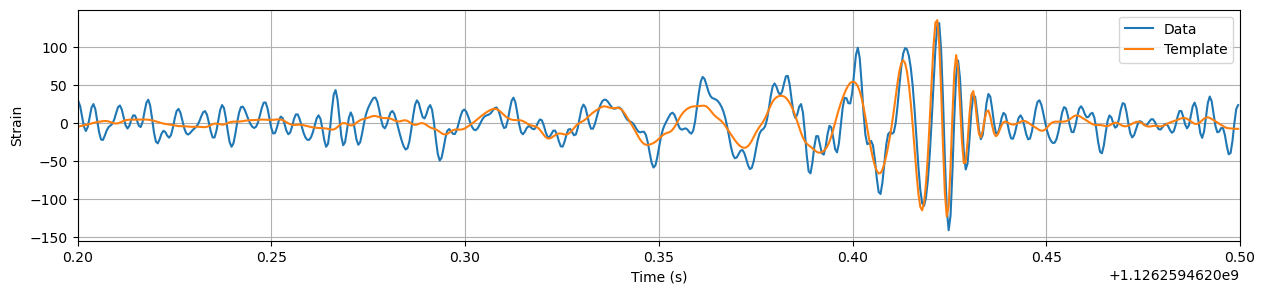

In [153]:
# Select the time around the merger
time_before = 0.2
time_after = 0.1

# Zoom into data
white_data         = white_data.time_slice(event.time - time_before, event.time + time_after)
white_template = white_template.time_slice(event.time - time_before, event.time + time_after)

# Plot the data
pylab.figure(figsize = [15, 3])
pylab.plot(white_data.sample_times, white_data, label="Data")
pylab.plot(white_template.sample_times, white_template, label="Template")

pylab.legend()
pylab.grid()
pylab.xlabel('Time (s)')
pylab.ylabel('Strain')
pylab.xlim(event.time - time_before, event.time + time_after)
pylab.show()

Finally,

/tmp/ipykernel_379/1005061434.py:16: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pylab.pcolormesh(t, f, p**0.5, vmin = 1, vmax = 6)


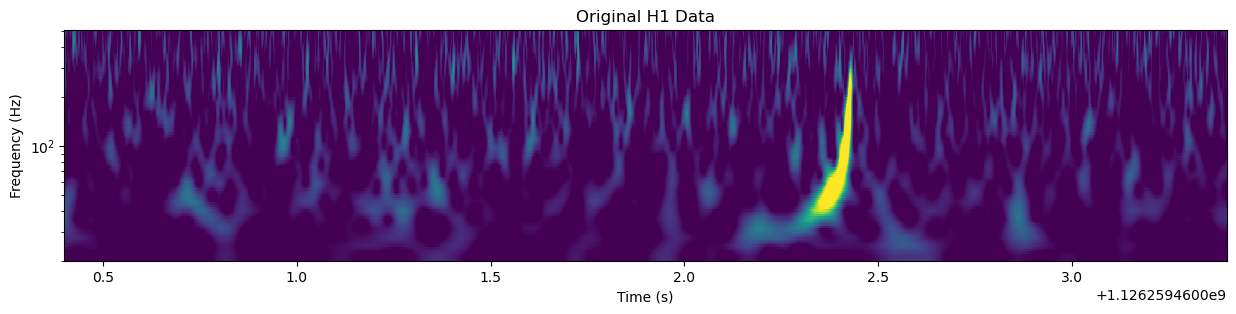

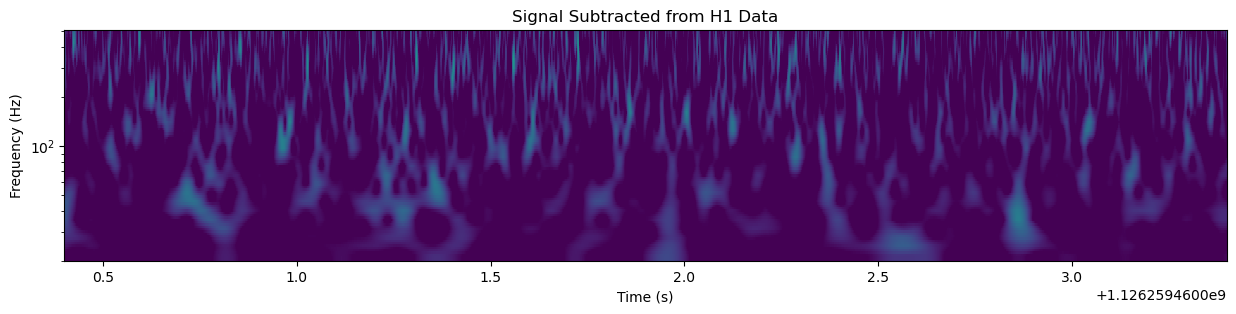

In [157]:
# Get subtracted signal
subtracted = conditioned - aligned

# Adjust time window, if wanted
time_before = 2
time_after = 1

# Plot the original data and the subtracted signal data
for data, title in [(conditioned, 'Original H1 Data'), (subtracted, 'Signal Subtracted from H1 Data')]:

    # Get the qtransform:
    t, f, p = data.whiten(4, 4).qtransform(.001, logfsteps = 100, qrange = (8, 8), frange = (20, 512))
    
    pylab.figure(figsize = [15, 3])
    pylab.title(title)
    pylab.pcolormesh(t, f, p**0.5, vmin = 1, vmax = 6)
    pylab.yscale('log')
    pylab.xlabel('Time (s)')
    pylab.ylabel('Frequency (Hz)')
    pylab.xlim(event.time - time_before, event.time + time_after)
    pylab.show()

### Challenge

Use the methods demonstrated above to see if you can calculate the SNR time series in the data sets imported in the previous challenge. What is the SNR of each signal? Which template matched which data?

Information that may be useful:
* Signals are all placed between 100 and 120 seconds into the frame file.
* You may assume mass1 = mass2 (equal mass) and that each component mass is one of 22, 36, or 50.
* Each file starts at gps time 0, and ends at gps time 128
* The channel name in each file is "H1:TEST-STRAIN"

In [158]:
# to finish . . . .

## Tutorial 4 - 